In [49]:
# importing the modules that will be used in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Adding Data

## Adding First Data Source

For my first data source, I used [The Weather Scraper](https://github.com/Karlheinzniebuhr/the-weather-scraper) to downloads weather data from the weather stations near my house.

In [50]:
# reading in data from local csv using pandas read_csv function
full_weather_df = pd.read_csv('KKYFORTT2.csv')

# displaying the top 5 rows of the newly created data frame to ensure it was loaded correctly. 
full_weather_df.head()

,Date,Time,Temperature_F,Dew_Point_F,Humidity_%,Wind,Speed_mph,Gust_mph,Pressure_in,Precip_Rate_in,Precip_Accum_in,UV,Solar_w/m2
0,1/1/2022,12:04 AM,63.5,61.2,92,WNW,4.8,6.9,30.14,0.00,0.00,0,0.0
1,1/1/2022,12:09 AM,63.4,61.2,93,WNW,3.9,6.1,30.14,0.00,0.00,0,0.0
2,1/1/2022,12:14 AM,63.1,61.1,94,WNW,2.8,4.5,30.14,0.05,0.01,0,0.0
3,1/1/2022,12:19 AM,62.9,60.9,94,WSW,3.5,5.1,30.14,0.05,0.01,0,0.0
4,1/1/2022,12:24 AM,62.6,60.6,94,West,2.9,4.6,30.14,0.05,0.01,0,0.0


In [51]:
# applying groupby() function to group the data by day and take the mean of the measurements I am intersted in for this project. 
daily_weather_df = full_weather_df.groupby('Date', as_index=False)["Temperature_F", "Humidity_%", "Pressure_in", "Precip_Rate_in", "UV"].mean()

daily_weather_df.head()

C:\Users\rebec\AppData\Local\Temp\ipykernel_34008\136343739.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  daily_weather_df = full_weather_df.groupby('Date', as_index=False)["Temperature_F", "Humidity_%", "Pressure_in", "Precip_Rate_in", "UV"].mean()


,Date,Temperature_F,Humidity_%,Pressure_in,Precip_Rate_in,UV
0,1/1/2022,55.932292,98.729167,30.077917,0.083819,0.000000
1,1/10/2022,23.358885,69.257840,30.852404,0.000000,0.407666
2,1/11/2022,23.203819,67.003472,30.858021,0.000000,0.520833
3,1/12/2022,39.423958,61.263889,30.513194,0.000000,0.520833
4,1/13/2022,40.048264,76.260417,30.284583,0.000000,0.298611


In [52]:
# converting the UV index colum from a float to an int
daily_weather_df.UV = daily_weather_df.UV.astype(int)

In [53]:
# Finally, I am going to make sure I have data for each day of the year
pd.date_range(start= '2022/01/01', end = "2022/12/31").difference(daily_weather_df.index)

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [54]:
daily_weather_df.dtypes

Date               object
Temperature_F     float64
Humidity_%        float64
Pressure_in       float64
Precip_Rate_in    float64
UV                  int32
dtype: object

## Adding the Second Dataset

For my second dataset, I exported a year's worth of activity data from my fitbit. 

In [55]:
# reading in a local excel document using the panads read_excel function
fitbit_df = pd.read_excel('Fitbit_Data.xlsx', sheet_name="Activity")

fitbit_df.head()
# displaying the top 5 rows of the newly created data frame to ensure it was loaded correctly. 

,Date,Calories_Burned,Steps,Distance,Floors,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Activity_Calories
0,2022-01-01,1982,2093,0.94,0,682,131,0,0,448
1,2022-01-02,2237,5612,2.52,1,684,231,0,0,818
2,2022-01-03,2286,7615,3.59,9,741,168,37,8,824
3,2022-01-04,2018,2639,1.19,1,955,140,0,0,487
4,2022-01-05,2018,2697,1.21,1,669,156,0,0,512


# Cleaning the Data
## Cleaning the First Dataset

In [56]:
daily_weather_df.dtypes

Date               object
Temperature_F     float64
Humidity_%        float64
Pressure_in       float64
Precip_Rate_in    float64
UV                  int32
dtype: object

In [57]:
# converting the columns from floats to ints using a for loop

cols = ["Temperature_F", "Humidity_%", "Pressure_in", "Precip_Rate_in", "UV"]
for x in cols:
    daily_weather_df[x] = daily_weather_df[x].apply(np.int64)

daily_weather_df.head()

,Date,Temperature_F,Humidity_%,Pressure_in,Precip_Rate_in,UV
0,1/1/2022,55,98,30,0,0
1,1/10/2022,23,69,30,0,0
2,1/11/2022,23,67,30,0,0
3,1/12/2022,39,61,30,0,0
4,1/13/2022,40,76,30,0,0


In [58]:
# Changing the Date column as a date type
daily_weather_df['Date'] = pd.to_datetime(daily_weather_df['Date'])

In [59]:
# renaming a column to be more specific
daily_weather_df.rename(columns={"UV": "UV_Index"}, inplace=True)

## Cleaning the Second Dataset

First, I will find days where I have very little or no activity recorded. Since these are days where I forgot to wear my fitbit, not days where I didn't move, I am going to replace the zeros with the mean for each column.

In [60]:
# replacing low step count days with 0
fitbit_df["Steps"].mask(fitbit_df['Steps'] <1000, 0, inplace=True)

In [61]:
# Since I have several columns where I need to replace zeros with the column mean, I will be using the replace function in a for loop

cols = ['Calories_Burned',
 'Steps',
 'Distance',
 'Floors',
 'Minutes_Sedentary',
 'Minutes_Lightly_Active',
 'Minutes_Fairly_Active',
 'Minutes_Very_Active',
 'Activity_Calories']

for x in cols:
    colname = fitbit_df[x]
    colname.replace(to_replace= 0, value=colname.mean(), inplace=True)

In [62]:
# Finally, I will convert the columns to ints

cols = ['Calories_Burned',
 'Steps',
 'Floors',
 'Minutes_Sedentary',
 'Minutes_Lightly_Active',
 'Minutes_Fairly_Active',
 'Minutes_Very_Active',
 'Activity_Calories']

for x in cols:
    fitbit_df = fitbit_df.astype({x : 'int'})

# Merging the Datasets

In [63]:
merged_df = pd.merge(daily_weather_df, fitbit_df, how='outer')

# sorting by date
merged_df = merged_df.sort_values(by=['Date'])

merged_df.shape


(365, 15)

In [64]:
merged_df.dtypes

Date                      datetime64[ns]
Temperature_F                    float64
Humidity_%                       float64
Pressure_in                      float64
Precip_Rate_in                   float64
UV_Index                         float64
Calories_Burned                    int32
Steps                              int32
Distance                         float64
Floors                             int32
Minutes_Sedentary                  int32
Minutes_Lightly_Active             int32
Minutes_Fairly_Active              int32
Minutes_Very_Active                int32
Activity_Calories                  int32
dtype: object

# Anaylsis

First, I want to find the days where I was the most and least active.

In [65]:
# Finding the max and min steps
max_steps = (merged_df['Steps'].max())
min_steps = (merged_df['Steps'].min())

# Finding the days that correspond with the max and min steps
most_active_day = merged_df.loc[merged_df['Steps'] == max_steps, 'Date'].iloc[0]
most_active_day = most_active_day.strftime('%B %d, %Y')
least_active_day = merged_df.loc[merged_df['Steps'] == min_steps, 'Date'].iloc[0]
least_active_day = least_active_day.strftime('%B %d, %Y')

print (f"I was most active on {most_active_day} and least active on {least_active_day}.")

I was most active on July 27, 2022 and least active on January 30, 2022.


Next, I want to see how many days of the year had a mean temperature below freezing. 

In [66]:
# how many days was the mean temp below freezing?
freezing_days = merged_df.query('Temperature_F <= 32')['Date'].count()

print(f'There were {freezing_days} days where the mean temperature was below freezing.')


There were 56 days where the mean temperature was below freezing.


In [67]:
# Finding the mean temp for each month

merged_df.groupby(pd.Grouper(key='Date', freq='M')).agg({'Temperature_F' : ['mean']})

,Temperature_F
,mean
Date,
2022-01-31,28.096774
2022-02-28,35.571429
2022-03-31,46.966667
2022-04-30,52.066667
2022-05-31,66.322581
2022-06-30,72.448276
2022-07-31,76.258065
2022-08-31,73.451613


sorted_steps = merged_df.sort_values(by='Steps', ascending=False)
sorted_steps.head(10)

# Visualization 

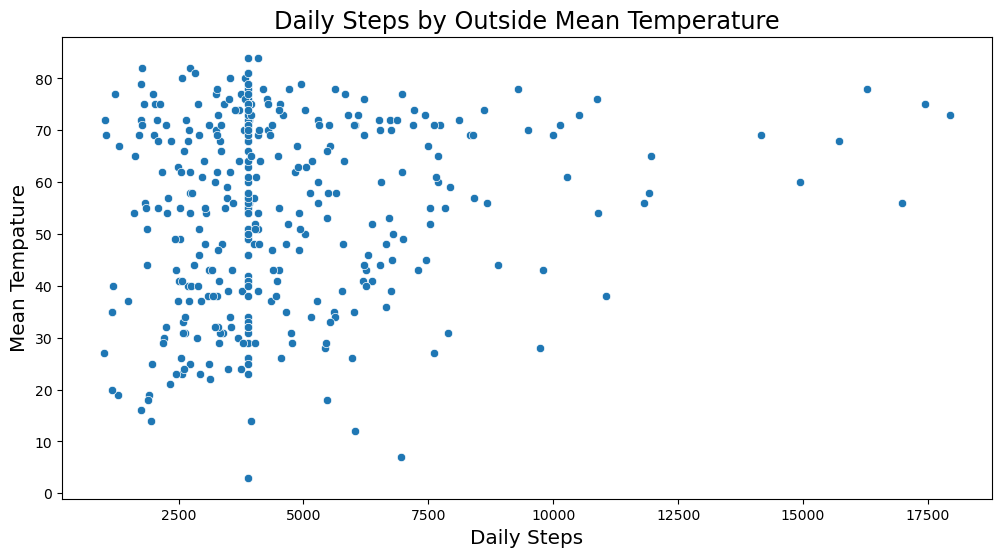

In [71]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=merged_df, x='Steps', y='Temperature_F')
plt.title("Daily Steps by Outside Mean Temperature", fontsize='xx-large')
plt.xlabel('Daily Steps', fontsize='x-large')
plt.ylabel('Mean Tempature', fontsize='x-large')
plt.show()

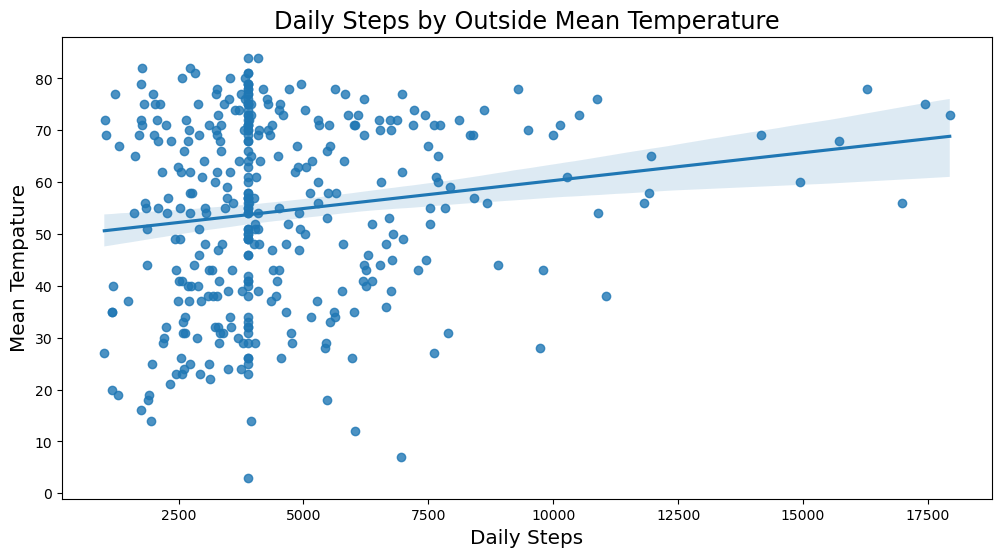

In [72]:
plt.figure(figsize=(12,6))
sns.regplot(data=merged_df, x='Steps', y='Temperature_F')
plt.title("Daily Steps by Outside Mean Temperature", fontsize='xx-large')
plt.xlabel('Daily Steps', fontsize='x-large')
plt.ylabel('Mean Tempature', fontsize='x-large')
plt.show()

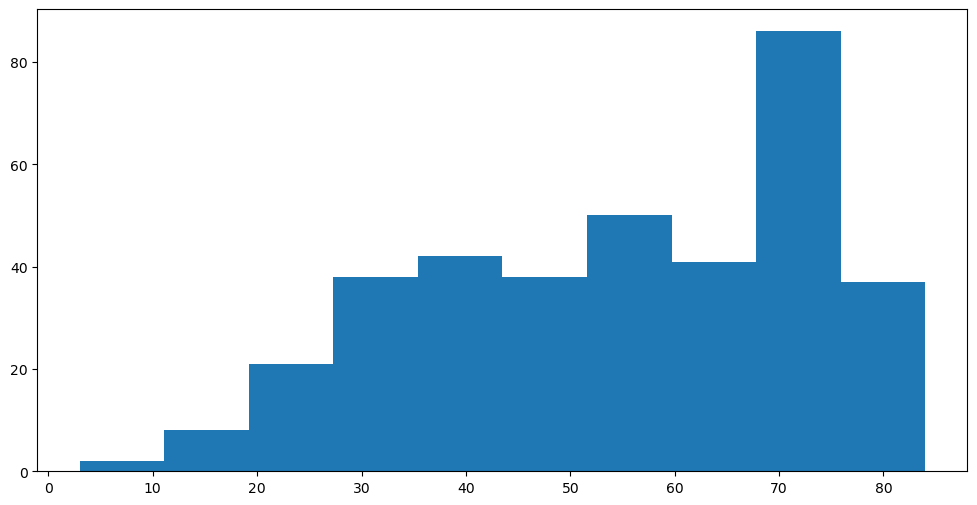

In [69]:
plt.figure(figsize=(12,6))
plt.hist(merged_df['Temperature_F'])
plt.show()